In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA # Principle Component Analysis
from sklearn.preprocessing import StandardScaler # Feature Scaling

### Load dataset

In [12]:
df = pd.read_csv('USArrests.csv', index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [13]:
# Check for Null values
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [19]:
# Average for each feature
df.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [20]:
# Variance for each feature
df.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [41]:
x = df.values

# Create PCA
model_pca = PCA()
x[:5]

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6]])

In [33]:
# Feature Scaling
sc = StandardScaler()
x_sc = sc.fit_transform(x)

In [39]:
x_sc[:5]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393]])

In [45]:
# Check the mean and variance of scalded features
df_sc = pd.DataFrame(data = x_sc, columns=df.columns)
df_sc.mean()

Murder     -8.437695e-17
Assault     1.298961e-16
UrbanPop   -4.263256e-16
Rape        8.326673e-16
dtype: float64

In [46]:
df_sc.var()

Murder      1.020408
Assault     1.020408
UrbanPop    1.020408
Rape        1.020408
dtype: float64

In [47]:
# Fit the model and transform
x_sc_pca = model_pca.fit_transform(x_sc)

In [59]:
# Look at principal components

"""We see that there are four distinct principal components. This is to be
expected because there are in general min(n − 1, p) informative principal
components in a data set with n observations and p variables."""

model_pca.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

In [165]:
df_components = pd.DataFrame(data = model_pca.components_.T, index=df.columns, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4'])
df_components

,PC 1,PC 2,PC 3,PC 4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [66]:
#principal component score vectors.
x_sc_pca.shape

(50, 4)

In [98]:
df_pca = pd.DataFrame(data = x_sc_pca, index=df.index, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4'])
df_pca.head()

,PC 1,PC 2,PC 3,PC 4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


In [92]:
# proportion of variance explained 
# by each of the four principal components in the USArrests data

proportion = model_pca.explained_variance_ratio_
proportion

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

<IPython.core.display.Javascript object>


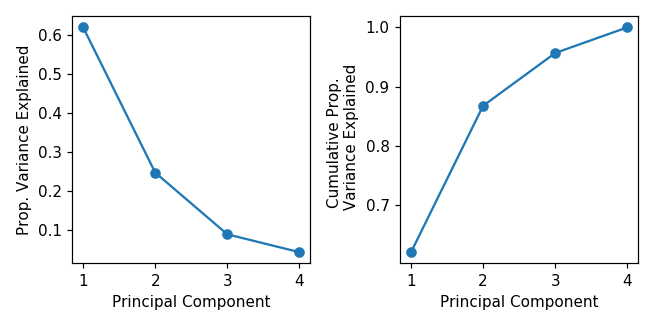

In [96]:
%matplotlib notebook
fig, axe = plt.subplots(1, 2, figsize = (6, 3))
axe[0].plot(range(1, 5), proportion, marker = 'o')
axe[0].set_ylabel('Prop. Variance Explained')
axe[0].set_xlabel('Principal Component')

cumul_prop = [sum(proportion[:i+1]) for i in range(len(proportion))]
axe[1].plot(range(1, 5), cumul_prop, marker = 'o')
axe[1].set_ylabel('Cumulative Prop. \n Variance Explained')
axe[1].set_xlabel('Principal Component')

plt.tight_layout()

<IPython.core.display.Javascript object>


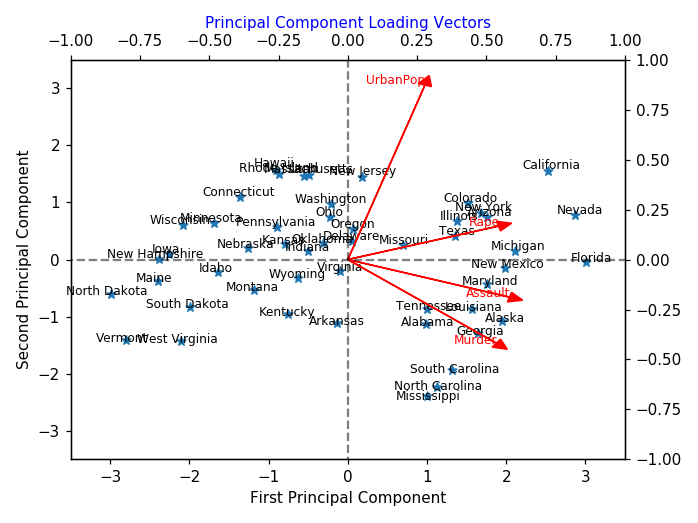

C:\Users\u0125384\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
C:\Users\u0125384\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


In [202]:
%matplotlib notebook
xs = df_pca['PC 1'].values
ys = df_pca['PC 2'].values

plt.scatter(xs,-ys, marker = '*')
xmin, xmax, ymin, ymax = -3.5, 3.5, -3.5, 3.5
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# zip joins label and (x, y) coordinates in pairs
for label, x,y in zip(labels, xs,-ys):
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 #xytext=(0,10), # distance from text to points (x,y)
                 ha='center', fontsize = 8) # horizontal alignment can be left, right or center
    

# Plot Principal Component loading vectors, using a second y-axis.
ax2 = plt.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='blue')
ax2.set_xlabel('Principal Component Loading Vectors', color='blue')

for index in df_components.index.tolist():
    label, x, y =  index, df_components.loc[index, 'PC 1'], df_components.loc[index, 'PC 2']
    ax2.arrow(0, 0, x, -y, head_width=0.05, head_length=0.05, fc='r', ec='r')
    ax2.annotate(label, (x,-y), textcoords="offset points", ha='right', fontsize = 8, color = 'r') 

plt.hlines(0, xmin = xmin, xmax = xmax, linestyle = '--', alpha = 0.5)
plt.vlines(0, ymin = ymin, ymax = ymax, linestyle = '--', alpha = 0.5)
plt.tight_layout()

In [185]:
df_components.columns.tolist()

['PC 1', 'PC 2', 'PC 3', 'PC 4']

In [194]:
df_components.loc['Assault', 'PC 1']

0.5831836349096707